In [38]:
import numpy as np
import pandas as pd
import itertools
import os
import time
import xgboost as xgb
import operator
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB as gnb
from moore_preprocessing import to_str

def generate_train_df(names):
    df_list = []
    for suffix in range(11):
      filename = prefix + to_str(suffix)
      file_dir = os.path.join(data_dir, filename)
      if os.path.exists(file_dir):
        print(file_dir)
        df = pd.read_csv(file_dir, names = names)
        df_list.append(df)
    data = pd.concat(df_list)
    return data

def to_str(num):
  if num < 10:
    string = '0' + str(num)
  else:
    string = str(num)
  return string

data_dir = '/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore'
# full_index = np.array(['0', '59', '94', '95', '84', '161', '44', '179', '82', '112', '58'])
non_num = [68,69,72,73,98,99,100,101,109,110,111,208,224,225,226,227,234,235,236,237
           ,242,243,244,245,246,247,248,8,69,98,100,109,110,111,224,225,226,227,234,
           235,236,237,242,243,244,245,246,247]
full_index = [x for x in range(249) if x not in non_num]
  # num_index = np.array([0, 59, 94, 95, 84, 161, 44, 179, 82, 112, 58])
  # currently, using the first four is the most accurate
prefix = 'entry'
classes = ['WWW','MAIL','FTP-CONTROL','FTP-PASV','ATTACK','P2P','DATABASE','FTP-DATA','MULTIMEDIA','SERVICES','INTERACTIVE','GAMES']
names = [x for x in range(249)]

In [32]:
df = generate_train_df(names)

/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry01


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (68,69,72,73,98,99,100,101,109,110,111,208,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry02


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (68,69,72,73,98,99,100,101,109,110,111,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry03
/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry04
/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry05


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (98,99,100,101,109,110,111,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry06


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (68,69,98,100,109,110,111,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry07
/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry08
/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry09
/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore/entry10


In [40]:
full_index = []
data = df[full_index].values

In [43]:
label = df[248].values

In [46]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [47]:
lgbc = LGBMClassifier()

In [48]:
lgbc.fit(data, label)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

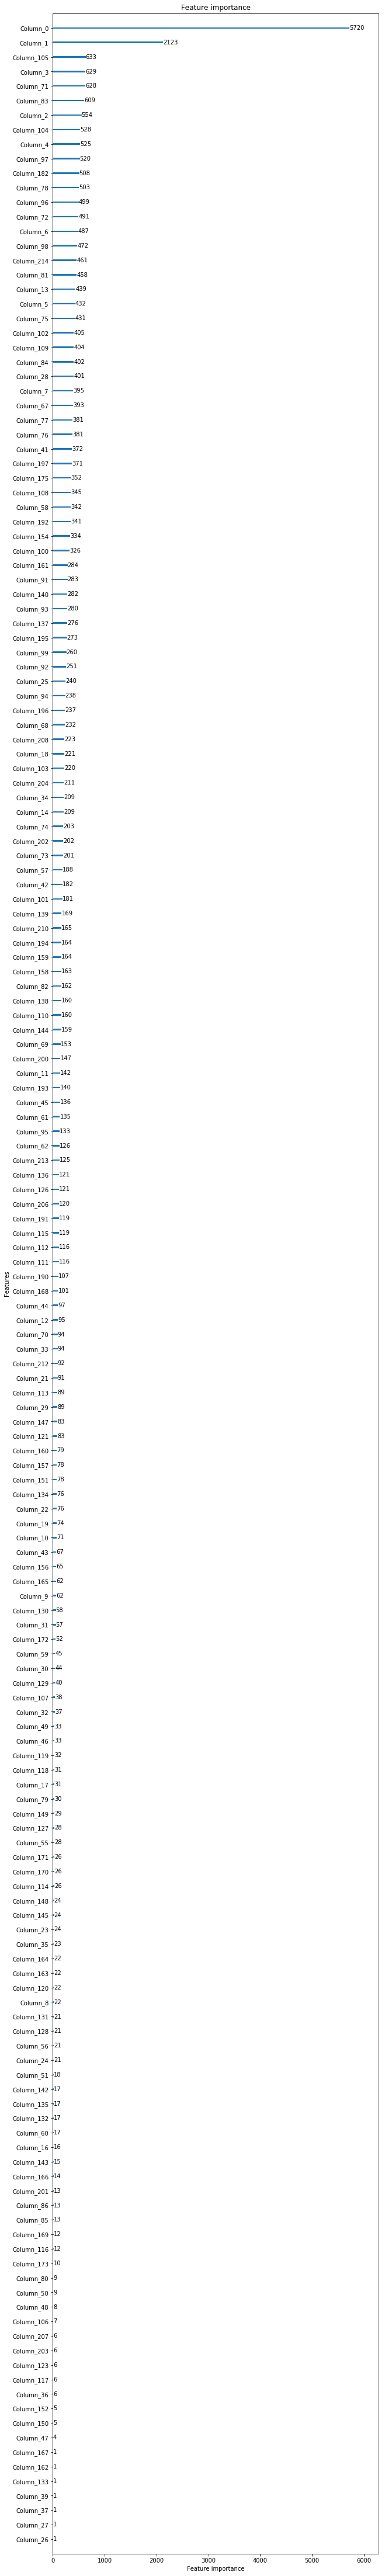

In [55]:
lgb.plot_importance(lgbc, height = .1, figsize = (10,80), grid = False)
plt.savefig('./aaa.png')